In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

#Loading the dataset-

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Copy of train_woheader.csv',header=None)

In [3]:
df.head()

,0,1
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


##Creating a Directed graph on the dataset

In [4]:
Directed_Graph=nx.read_edgelist('/content/drive/MyDrive/Copy of train_woheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(Directed_Graph))

DiGraph with 1862220 nodes and 9437519 edges


##Creating graph visualization for top 50 edge list-

DiGraph with 66 nodes and 50 edges


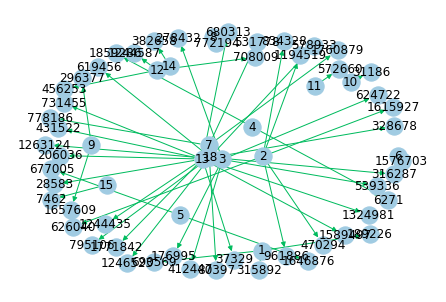

In [ ]:
SG=Directed_Graph.edge_subgraph(df.iloc[:50,:].apply(lambda x:(x[0],x[1]),axis=1).tolist())
pos=nx.spring_layout(SG)
nx.draw(SG,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(SG))

#Basic EDA -

##Analysis on the no of followers of each user ie node-

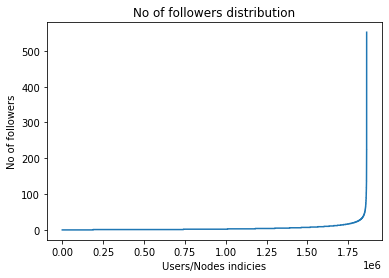

In [ ]:
followers=list(dict(Directed_Graph.in_degree()).values())
followers=sorted(followers)
plt.plot(followers)
plt.xlabel("Users/Nodes indicies")
plt.ylabel("No of followers")
plt.title("No of followers distribution")
plt.show()

##Conclusion-

As we can see from the graph that for a large no of uses/nodes the followers are very less and for small no of users followers are above 100 and also for very small no of users the followers are above 400 or 500

##Looking at the percentile values in order to quantify the data- 

In [ ]:
np.array(followers)
a=np.linspace(10,100,num=10)
percentile=np.percentile(followers,a)

for i,j in zip(percentile.tolist(),a.tolist()):
  print("{}th percentile of total followers is {}".format(int(j),i))


10th percentile of total followers is 0.0
20th percentile of total followers is 1.0
30th percentile of total followers is 1.0
40th percentile of total followers is 2.0
50th percentile of total followers is 2.0
60th percentile of total followers is 3.0
70th percentile of total followers is 5.0
80th percentile of total followers is 7.0
90th percentile of total followers is 12.0
100th percentile of total followers is 552.0


##Conclusion-

90% of users/nodes have 12 or less than 12 followers and no user/node have follower more than 552

max no of followers=552
min_no of followers=0

##Analysis on no of users following another users-

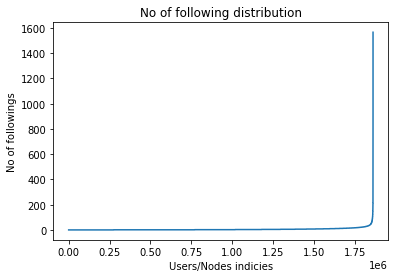

In [ ]:
following=list(dict(Directed_Graph.out_degree()).values())
#sns.kdeplot(following)
following=sorted(following)
plt.plot(following)
plt.xlabel("Users/Nodes indicies")
plt.ylabel("No of followings")
plt.title("No of following distribution")
plt.show()

##Conclusion-

As we can see that max no of followings is 1600 approx by a particular user /node and many users are following very less no of users

##Looking at the percentile values in order to quantify the data- 

In [ ]:
np.array(following)
a=np.linspace(10,100,num=10)
percentile=np.percentile(following,a)

for i,j in zip(percentile.tolist(),a.tolist()):
  print("{}th percentile of total followers is {}".format(int(j),i))


10th percentile of total followers is 0.0
20th percentile of total followers is 1.0
30th percentile of total followers is 1.0
40th percentile of total followers is 1.0
50th percentile of total followers is 2.0
60th percentile of total followers is 3.0
70th percentile of total followers is 5.0
80th percentile of total followers is 7.0
90th percentile of total followers is 12.0
100th percentile of total followers is 1566.0


##Conclusion-

max no of following done by a user is 1566 and minimum no of followings is 0
and also this shows that there are very few people following one another 

##No of followers +no of followings

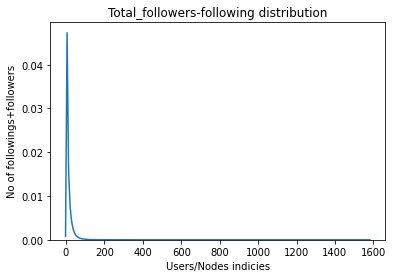

In [ ]:
total_followers_following=list(dict(Directed_Graph.degree()).values())
sns.kdeplot(total_followers_following)
plt.xlabel("Users/Nodes indicies")
plt.ylabel("No of followings+followers")
plt.title("Total_followers-following distribution")
plt.show()

##Conclusion-

we can see that total no of followers and following of very few users are igh but most of them neither have followers or not following any other user/node

##Looking at the percentile values in order to quantify the data- 

In [ ]:
np.array(total_followers_following)
a=np.linspace(10,100,num=10)
percentile=np.percentile(total_followers_following,a)

for i,j in zip(percentile.tolist(),a.tolist()):
  print("{}th percentile of total followers is {}".format(int(j),i))


10th percentile of total followers is 1.0
20th percentile of total followers is 2.0
30th percentile of total followers is 2.0
40th percentile of total followers is 3.0
50th percentile of total followers is 4.0
60th percentile of total followers is 6.0
70th percentile of total followers is 9.0
80th percentile of total followers is 14.0
90th percentile of total followers is 24.0
100th percentile of total followers is 1579.0


##Conclusion-

Max no of followers + followings that a user has is 1579 and very large no of users have very less total followers and followings value

#Posing this as supervised learning classification problem-

## we would be posing it as a binary classification problem with class label 1 for the source and destination nodes which have a direct edge between them.
##In order to create clss label 0 points what we are going to do is out of the total no of possible edges we are going to create a subset of data for which direct edge is not present in the main train data and the shortest length from one node to another node is greater than 2


In [ ]:
import random
class_0_datapoints=[]
a=9437519
while(a!=0):
  src_node=random.randint(1,1862220)
  dest_node=random.randint(1,1862220)
  if((src_node,dest_node) not in Directed_Graph.edges() and src_node!=dest_node):
    if nx.has_path(Directed_Graph,src_node,dest_node):

      if(nx.shortest_path_length(Directed_Graph, source=src_node, target=dest_node, weight=None, method='dijkstra')>2):
        class_0_datapoints.append((src_node,dest_node))
        a=a-1
        print(a)
      else:
        pass
    else:
      pass


In [ ]:
from sklearn.model_selection import train_test_split
if (not os.path.isfile('data/after_eda/train_pos_after_eda.csv')) and (not os.path.isfile('data/after_eda/test_pos_after_eda.csv')):
    #reading total data df
    df_pos = pd.read_csv('data/train.csv')
    df_neg = pd.DataFrame(list(class_0_datapoints), columns=['source_node', 'destination_node'])
    
    print("Number of nodes in the graph with edges", df_pos.shape[0])
    print("Number of nodes in the graph without edges", df_neg.shape[0])
    
    #Trian test split 
    #Spiltted data into 80-20 
    #positive links and negative links seperatly because we need positive training data only for creating graph 
    #and for feature generation
    X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)
    
    #removing header and saving
    X_train_pos.to_csv('data/after_eda/train_pos_after_eda.csv',header=False, index=False)
    X_test_pos.to_csv('data/after_eda/test_pos_after_eda.csv',header=False, index=False)
    X_train_neg.to_csv('data/after_eda/train_neg_after_eda.csv',header=False, index=False)
    X_test_neg.to_csv('data/after_eda/test_neg_after_eda.csv',header=False, index=False)
else:
    #Graph from Traing data only 
    del missing_edges

In [4]:
train_pos_graph=nx.read_edgelist('/content/drive/MyDrive/Copy of train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
test_pos_graph=nx.read_edgelist('/content/drive/MyDrive/Copy of test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

In [8]:
#Looking at the similarity percentage between train and test dataset-
train_pos_nodes=set(train_pos_graph.nodes())
test_pos_nodes=set(test_pos_graph.nodes())
cmn_data_points_percentage=len(train_pos_nodes.intersection(test_pos_nodes))/(len(test_pos_nodes))
data_test_not_train_percentage=len(test_pos_nodes-train_pos_nodes)/(len(test_pos_nodes))
print("common % of data in train and test are:",cmn_data_points_percentage*100)
print("% of data present in test but not in train are:",data_test_not_train_percentage*100)

common % of data in train and test are: 92.87992640371546
% of data present in test but not in train are: 7.1200735962845405


In [ ]:
#stored the pos and neg data for both train and test in  the below csv file and loading it as training and test dataset-
X_Train=pd.read_csv('/content/drive/MyDrive/Copy of train_after_eda.csv')
X_Test=pd.read_csv('/content/drive/MyDrive/Copy of test_after_eda.csv')

#Feature engineering for the dataset-

## 2.1 Jaccard Distance:
http://www.statisticshowto.com/jaccard-index/


\begin{equation}
j = \frac{|X\cap Y|}{|X \cup Y|} 
\end{equation}




## Approach-

We will be calculating the jaccard distance between each pair of verticies and higher the overlap between neighbours of each verticies
more will be the jaccard distance , hence more chances of being a similar node

## Note- We will be doing it for both followers(out degree node) and followees(in degree node)-

In [22]:
#Jaccard distance function for followers-
def jaccard_distance_followers(u,v,Directed_Graph):
  try:
    if (Directed_Graph.successors(u)|Directed_Graph.successors(v)!=0):
      X=set(Directed_Graph.successors(u))
      Y=set(Directed_Graph.successors(v))
      jd=len(X.intersection(Y))/(len(X.union(Y)))
  except:
     jd=0
  return jd




In [23]:
#Testing a query point(which is not present in di graph)-
dist=jaccard_distance_followers(1,200000000000,Directed_Graph)

In [24]:
print(dist)

0


In [25]:
#Jaccard distance function for followees-
def jaccard_distance_followees(u,v,Directed_Graph):
  try:
    if (Directed_Graph.predecessors(u)|Directed_Graph.predecessors(v)!=0):
      X=set(Directed_Graph.predecessors(u))
      Y=set(Directed_Graph.predecessors(v))
      jd=len(X.intersection(Y))/(len(X.union(Y)))
  except:
     jd=0
  return jd

In [26]:
#Testing a query point that is present in the Di graph-

dist=jaccard_distance_followees(1,690569,Directed_Graph)

In [27]:
print(dist)

0


## 2.2 Cosine distance


\begin{equation}
CosineDistance = \frac{|X\cap Y|}{|X|\cdot|Y|} 
\end{equation}


## Approach-

We will be calculating the cosine distance between each pair of verticies and higher the overlap between neighbours of each verticies
more will be the cosine distance , hence more chances of being a similar node

## Note- We will be doing it for both followers(out degree node) and followees(in degree node)-

In [29]:
#Cosine distance for followers-
def cosine_distance_followers(u,v,Directed_Graph):
  try:
    if (Directed_Graph.successors(u)|Directed_Graph.successors(v)!=0):
      X=set(Directed_Graph.successors(u))
      Y=set(Directed_Graph.successors(v))
      cd=len(X.intersection(Y))/(len(X)+len(Y))
  except:
     cd=0
  return cd


In [30]:
#Cosine distance for followees-
def cosine_distance_followees(u,v,Directed_Graph):
  try:
    if (Directed_Graph.predecessors(u)|Directed_Graph.predecessors(v)!=0):
      X=set(Directed_Graph.predecessors(u))
      Y=set(Directed_Graph.predecessors(v))
      cd=len(X.intersection(Y))/(len(X)+len(Y))
  except:
     cd=0
  return cd


#3) Page Ranking

Approach-

Page rank will calculate the rank/importance in term of probabilities for each verticies. For every pair of source and target nodes we will be caclulating page rank of source node as well as destination node, Hence page rank for the dataset will be an array of n (number of rows in training dataset) * m( 2 , one for source and other for target)

In [31]:
#Calculating page rank-

def page_rank(u,v,Directed_Graph):
  pr=[]
  #For source node-
  S=nx.DiGraph(Directed_Graph.path_graph(u))
  source=nx.pagerank(S,alpha=0.85)
  pr.append(source)
  #For Target node-
  T=nx.DiGraph(Directed_Graph.path_graph(v))
  target=nx.pagerank(T,alpha=0.85)
  pr.append(target)
  return pr,



# 4. Other Graph Features

## 4.1 Shortest path:

Getting Shortest path between twoo nodes, if nodes have direct path i.e directly connected then we are removing that edge and calculating path. 

In [15]:
#Function for calculating shortest path length-

def shortest_path(u,v,Directed_Graph):

  try:
    if nx.has_path(Directed_Graph,src_node,dest_node):
      Directed_Graph.remove_edge(u, v)
      spl=nx.shortest_path_length(Directed_Graph,u,v)
      Directed_Graph.add_edge(u,v)
    else:
      return -1
    return spl

    

    
  except:
    return -1
  




In [37]:
#testing
shortest_path(77697, 826021,Directed_Graph)

-1

## 4.2 Checking for same community

In [24]:
#Function to calculate weekly connected components which will determine wether the given pair of nodes belong to same community or not-

wkly_cn_comp=nx.weakly_connected_components(Directed_Graph)
def common_community(u,v,wkly_cn_comp,Directed_Graph):
  
  if Directed_Graph.has_edge(u,v):
    if Directed_Graph.has_edge(v,u):
      for i in wkly_cn_comp:
        if u in i:
          if v in i:
            Directed_Graph.remove_edge(v,u)
            if(shortest_path==-1):
              Directed_Graph.add_edge(v,u)
              return 0
            else:
              Directed_Graph.add_edge(v,u)
              return 1
    if Directed_Graph.has_edge(u,v):
      for i in wkly_cn_comp:
        if u in i:
          if v in i:
            Directed_Graph.remove_edge(u,v)
            if(shortest_path==-1):
              Directed_Graph.add_edge(u,v)
              return 0
            else:
              Directed_Graph.add_edge(u,v)
              return 1
  else:
    for i in wkly_cn_comp:
      if u in i:
        if v in i:
          return 1
        else:
          return 0
      return 0
  


  

In [25]:
#Testing point-
common_community(861, 1659750,wkly_cn_comp,Directed_Graph)

0

In [27]:
#Testing point-
common_community(669354,1635354,wkly_cn_comp,Directed_Graph)

0

## 4.3 Adamic/Adar Index:
Adamic/Adar measures is defined as inverted sum of degrees of common neighbours for given two vertices.
$$A(x,y)=\sum_{u \in N(x) \cap N(y)}\frac{1}{log(|N(u)|)}$$

In [34]:
#Calculating Adar index for pair of verticies-
import math as m
def Adar_index(u,v,Directed_Graph):
  if((Directed_Graph.has_node(u)) and (Directed_Graph.has_node(v))):
    Adar_index=0
    Neighbour_u=list(Directed_Graph.successors(u))+list(Directed_Graph.predecessors(u))
    Neighbour_v=list(Directed_Graph.successors(v))+list(Directed_Graph.predecessors(v))
    cmn_neighbours=list(set(Neighbour_u).intersection(set(Neighbour_v)))
    for i in cmn_neighbours:
      neigh_cmn_neighbours=list(Directed_Graph.successors(i))+list(Directed_Graph.predecessors(i))
      Adar_index=Adar_index+(1/m.log(len(neigh_cmn_neighbours)))
  else:
    Adar_index=0

  return Adar_index

In [36]:
Adar_index(669354,1635354,Directed_Graph)

0

## 4.4 Is person was following back:

In [41]:
def person_follow_back(u,v,Directed_Graph):
  if Directed_Graph.has_edge(v,u):
    return 1
  else:
    return 0

In [42]:
person_follow_back(1,189226,Directed_Graph)

1

## 4.5 Katz Centrality:
https://en.wikipedia.org/wiki/Katz_centrality

https://www.geeksforgeeks.org/katz-centrality-centrality-measure/
 Katz centrality computes the centrality for a node 
    based on the centrality of its neighbors. It is a 
    generalization of the eigenvector centrality. The
    Katz centrality for node `i` is
 
$$x_i = \alpha \sum_{j} A_{ij} x_j + \beta,$$
where `A` is the adjacency matrix of the graph G 
with eigenvalues $$\lambda$$.

The parameter $$\beta$$ controls the initial centrality and 

$$\alpha < \frac{1}{\lambda_{max}}.$$

In [43]:
from networkx.algorithms.centrality import katz_centrality
centrality=katz_centrality(Directed_Graph,alpha=0.005,beta=1)

In [45]:
#Loading the score into pickle file for later use-
import pickle
pickle.dump(centrality,open('/content/drive/MyDrive/katz_centrality','wb'))

## 4.6 Hits Score
The HITS algorithm computes two numbers for a node. Authorities estimates the node value based on the incoming links. Hubs estimates the node value based on outgoing links.

https://en.wikipedia.org/wiki/HITS_algorithm

In [47]:
from networkx.algorithms.link_analysis.hits_alg import hits
hits_score=hits(Directed_Graph,max_iter=100, tol=1e-08, nstart=None, normalized=True)
pickle.dump(hits_score,open('/content/drive/MyDrive/hits_score','wb'))

##SVD decomposition-


##As we are aware that SVD helps in creating new features by doing matrix decomposition/Factorization, so we would be performing decomposition on each vertix and try to bring out a n-d dimensional features out of it

In [49]:
#Creating adjancey matrix that will be used for decomposition-
from networkx.linalg.graphmatrix import adjacency_matrix
A=adjacency_matrix(Directed_Graph,sorted(Directed_Graph.nodes()))


In [56]:
from sklearn.utils.extmath import randomized_svd
U, Sigma, VT=randomized_svd(A,n_components=6)

In [58]:
print(U.shape)
print(Sigma.shape)
print(VT.shape)

(1862220, 6)
(6,)
(6, 1862220)


In [65]:
#Function for fetching the vectors of given nodes from both the decomposed matricies-
def truncated_svd(v,u,U,VT):
  U_1=U[u,:]
  U_2=U[v,:]
  V_1=VT[:,u]
  V_2=VT[:,v]
  return U_1,U_2,V_1,V_2






#### Weight Features


In order to determine the similarity of nodes, an edge weight value was calculated between nodes. Edge weight decreases as the neighbor count goes up. Intuitively, consider one million people following a celebrity on a social network then chances are most of them never met each other or the celebrity. On the other hand, if a user has 30 contacts in his/her social network, the chances are higher that many of them know each other. 
`credit` - Graph-based Features for Supervised Link Prediction
William Cukierski, Benjamin Hamner, Bo Yang


\begin{equation}
W = \frac{1}{\sqrt{1+|X|}}
\end{equation}

In [66]:
def weight_features(u,v,Directed_Graph):
  in_degree_weight_u=0
  in_degree_weight_v=0
  out_degree_weight_u=0
  out_degree_weight_v=0
  num_followees_u=len(set(Directed_Graph.predecessors(u)))
  num_u_following=len(set(Directed_Graph.successors(u)))
  num_followees_v=len(set(Directed_Graph.predecessors(v)))
  num_v_following=len(set(Directed_Graph.successors(v)))
  
  in_degree_weight_u=1/np.sqrt(1+len(num_followees_u))
  in_degree_weight_v=1/np.sqrt(1+len(num_followees_v))
  out_degree_weight_u=1/np.sqrt(1+len(num_u_following))
  out_degree_weight_v=1/np.sqrt(1+len(num_v_following))
  return in_degree_weight_u,in_degree_weight_v,out_degree_weight_u,out_degree_weight_v






##Total no of features would be-

<ol>
<li>jaccard_followers</li>
<li>jaccard_followees</li>
<li>cosine_followers</li>
<li>cosine_followees</li>
<li>num_followers_s</li>
<li>num_followees_s</li>
<li>num_followers_d</li>
<li>num_followees_d</li>
<li>inter_followers</li>
<li>inter_followees</li>
</ol>
<li>Page Ranking of source</li>
<li>Page Ranking of dest</li>
<li>katz of source</li>
<li>katz of dest</li>
<li>hubs of source</li>
<li>hubs of dest</li>
<li>authorities_s of source</li>
<li>authorities_s of dest</li>
</ol>
svd(24 vectors)
li>Weight Features
    <ul>
        <li>weight of incoming edges</li>
        <li>weight of outgoing edges</li>
        <li>weight of incoming edges + weight of outgoing edges</li>
        <li>weight of incoming edges * weight of outgoing edges</li>
        <li>2*weight of incoming edges + weight of outgoing edges</li>
        <li>weight of incoming edges + 2*weight of outgoing edges</li>
    </ul>


##Combing all these features value by calling the respective function on train and test and creating the final train and test data for model building-



Putting all the final data after combing in "final_train' and "final test' respectively-

In [ ]:
if not os.path.isfile('data/fea_sample/storage_sample_stage1.h5'):
    df_final_train['num_followers_s'], df_final_train['num_followers_d'], \
    df_final_train['num_followees_s'], df_final_train['num_followees_d'], \
    df_final_train['inter_followers'], df_final_train['inter_followees']= compute_features_stage1(df_final_train)
    
    df_final_test['num_followers_s'], df_final_test['num_followers_d'], \
    df_final_test['num_followees_s'], df_final_test['num_followees_d'], \
    df_final_test['inter_followers'], df_final_test['inter_followees']= compute_features_stage1(df_final_test)
    
    hdf = HDFStore('storage_sample_stage1.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('storage_sample_stage1.h5', 'train_df',mode='r')
    df_final_test = read_hdf('storage_sample_stage1.h5', 'test_df',mode='r')




if not os.path.isfile('storage_sample_stage2.h5'):
    #mapping adar index on train
    df_final_train['adar_index'] = df_final_train.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)
    #mapping adar index on test
    df_final_test['adar_index'] = df_final_test.apply(lambda row: calc_adar_in(row['source_node'],row['destination_node']),axis=1)

    #--------------------------------------------------------------------------------------------------------
    #mapping followback or not on train
    df_final_train['follows_back'] = df_final_train.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

    #mapping followback or not on test
    df_final_test['follows_back'] = df_final_test.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)

    #--------------------------------------------------------------------------------------------------------
    #mapping same component of wcc or not on train
    df_final_train['same_comp'] = df_final_train.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)

    ##mapping same component of wcc or not on train
    df_final_test['same_comp'] = df_final_test.apply(lambda row: belongs_to_same_wcc(row['source_node'],row['destination_node']),axis=1)
    
    #--------------------------------------------------------------------------------------------------------
    #mapping shortest path on train 
    df_final_train['shortest_path'] = df_final_train.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)
    #mapping shortest path on test
    df_final_test['shortest_path'] = df_final_test.apply(lambda row: compute_shortest_path_length(row['source_node'],row['destination_node']),axis=1)

    hdf = HDFStore('data/fea_sample/storage_sample_stage2.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('storage_sample_stage2.h5', 'train_df',mode='r')
    df_final_test = read_hdf('storage_sample_stage2.h5', 'test_df',mode='r')

f not os.path.isfile('data/fea_sample/storage_sample_stage3.h5'):
    #mapping to pandas train
    df_final_train['weight_in'] = df_final_train.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
    df_final_train['weight_out'] = df_final_train.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))

    #mapping to pandas test
    df_final_test['weight_in'] = df_final_test.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
    df_final_test['weight_out'] = df_final_test.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))


    #some features engineerings on the in and out weights
    df_final_train['weight_f1'] = df_final_train.weight_in + df_final_train.weight_out
    df_final_train['weight_f2'] = df_final_train.weight_in * df_final_train.weight_out
    df_final_train['weight_f3'] = (2*df_final_train.weight_in + 1*df_final_train.weight_out)
    df_final_train['weight_f4'] = (1*df_final_train.weight_in + 2*df_final_train.weight_out)

    #some features engineerings on the in and out weights
    df_final_test['weight_f1'] = df_final_test.weight_in + df_final_test.weight_out
    df_final_test['weight_f2'] = df_final_test.weight_in * df_final_test.weight_out
    df_final_test['weight_f3'] = (2*df_final_test.weight_in + 1*df_final_test.weight_out)
    df_final_test['weight_f4'] = (1*df_final_test.weight_in + 2*df_final_test.weight_out)
if not os.path.isfile('data/fea_sample/storage_sample_stage3.h5'):
    
    #page rank for source and destination in Train and Test
    #if anything not there in train graph then adding mean page rank 
    df_final_train['page_rank_s'] = df_final_train.source_node.apply(lambda x:pr.get(x,mean_pr))
    df_final_train['page_rank_d'] = df_final_train.destination_node.apply(lambda x:pr.get(x,mean_pr))

    df_final_test['page_rank_s'] = df_final_test.source_node.apply(lambda x:pr.get(x,mean_pr))
    df_final_test['page_rank_d'] = df_final_test.destination_node.apply(lambda x:pr.get(x,mean_pr))
    #================================================================================

    #Katz centrality score for source and destination in Train and test
    #if anything not there in train graph then adding mean katz score
    df_final_train['katz_s'] = df_final_train.source_node.apply(lambda x: katz.get(x,mean_katz))
    df_final_train['katz_d'] = df_final_train.destination_node.apply(lambda x: katz.get(x,mean_katz))

    df_final_test['katz_s'] = df_final_test.source_node.apply(lambda x: katz.get(x,mean_katz))
    df_final_test['katz_d'] = df_final_test.destination_node.apply(lambda x: katz.get(x,mean_katz))
    #================================================================================

    #Hits algorithm score for source and destination in Train and test
    #if anything not there in train graph then adding 0
    df_final_train['hubs_s'] = df_final_train.source_node.apply(lambda x: hits[0].get(x,0))
    df_final_train['hubs_d'] = df_final_train.destination_node.apply(lambda x: hits[0].get(x,0))

    df_final_test['hubs_s'] = df_final_test.source_node.apply(lambda x: hits[0].get(x,0))
    df_final_test['hubs_d'] = df_final_test.destination_node.apply(lambda x: hits[0].get(x,0))
    #================================================================================

    #Hits algorithm score for source and destination in Train and Test
    #if anything not there in train graph then adding 0
    df_final_train['authorities_s'] = df_final_train.source_node.apply(lambda x: hits[1].get(x,0))
    df_final_train['authorities_d'] = df_final_train.destination_node.apply(lambda x: hits[1].get(x,0))

    df_final_test['authorities_s'] = df_final_test.source_node.apply(lambda x: hits[1].get(x,0))
    df_final_test['authorities_d'] = df_final_test.destination_node.apply(lambda x: hits[1].get(x,0))
    #================================================================================

    hdf = HDFStore('data/fea_sample/storage_sample_stage3.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('data/fea_sample/storage_sample_stage3.h5', 'train_df',mode='r')
    df_final_test = read_hdf('data/fea_sample/storage_sample_stage3.h5', 'test_df',mode='r')
if not os.path.isfile('data/fea_sample/storage_sample_stage4.h5'):
    #===================================================================================================
    
    df_final_train[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
    df_final_train.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
    df_final_train[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
    df_final_train.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    #===================================================================================================
    
    df_final_train[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
    df_final_train.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

    df_final_train[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
    df_final_train.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    #===================================================================================================
    
    df_final_test[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6']] = \
    df_final_test.source_node.apply(lambda x: svd(x, U)).apply(pd.Series)
    
    df_final_test[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5','svd_u_d_6']] = \
    df_final_test.destination_node.apply(lambda x: svd(x, U)).apply(pd.Series)

    #===================================================================================================
    
    df_final_test[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6',]] = \
    df_final_test.source_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)

    df_final_test[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5','svd_v_d_6']] = \
    df_final_test.destination_node.apply(lambda x: svd(x, V.T)).apply(pd.Series)
    #===================================================================================================

    hdf = HDFStore('data/fea_sample/storage_sample_stage4.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()

#Model Building-

In [72]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [67]:
#Now reading the stored final data-
from pandas import read_hdf
df_final_train = read_hdf('/content/drive/MyDrive/Copy of storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/drive/MyDrive/Copy of storage_sample_stage4.h5', 'test_df',mode='r')

In [68]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [69]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [70]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

##Hyperparameter tunning-


Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

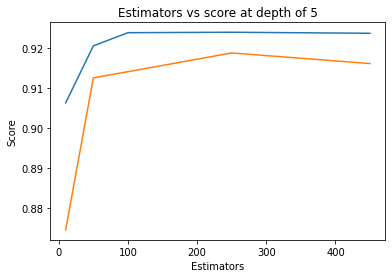

In [73]:
#Choosing the best value for no of estimators-
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


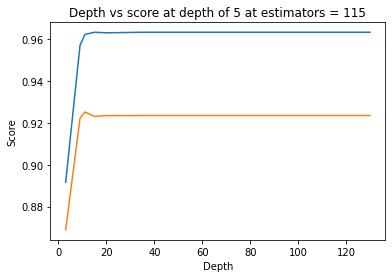

In [74]:
#Choosing the right value of depth-
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [ ]:
#Using random search for hyperparameter tunning-

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)


In [76]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


##Using the best estimator value to build Random forest model-


In [77]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [78]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [79]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [80]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


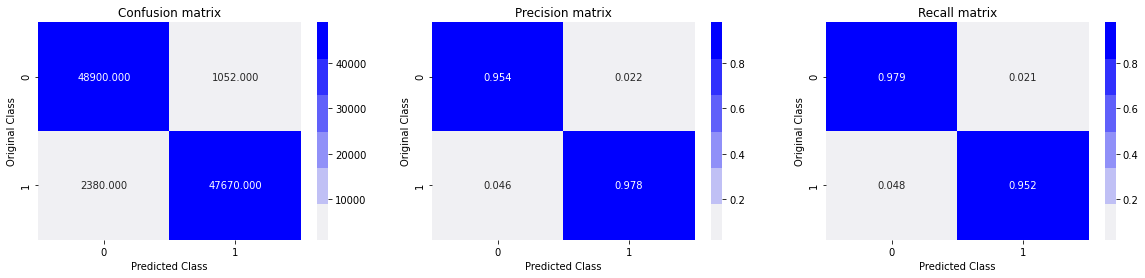

Test confusion_matrix


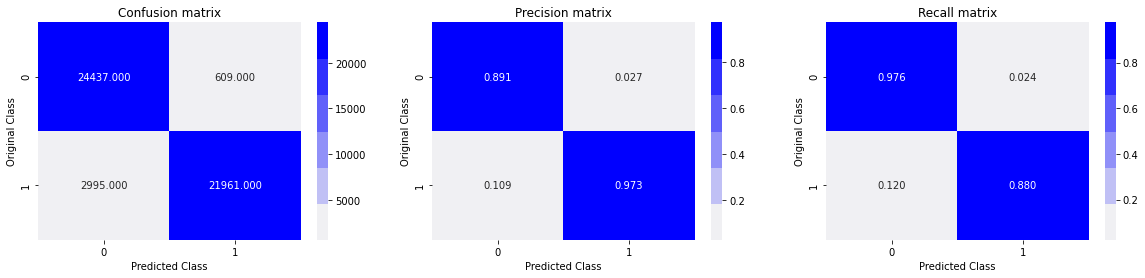

In [81]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

##Feature importance in determining friend recommendations-

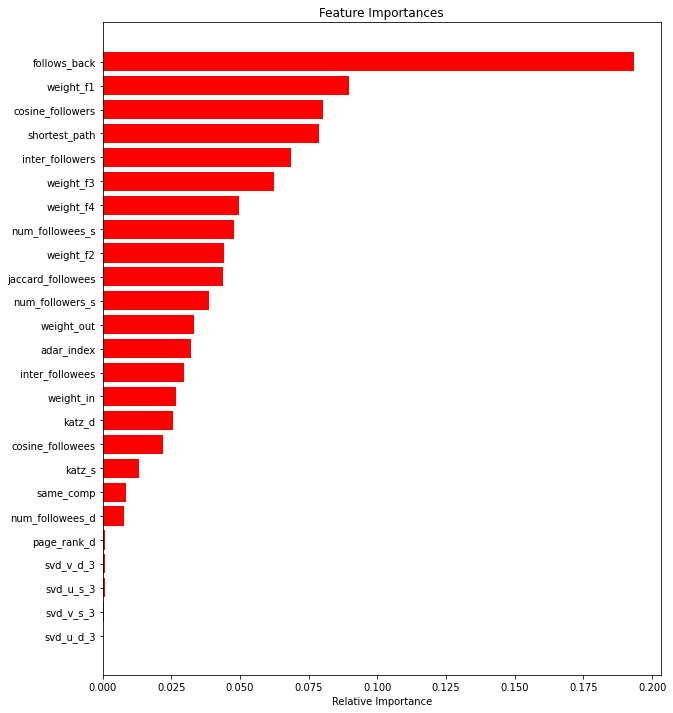

In [82]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()